In [35]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [37]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(30.799873310134714, 28.933568911650752), (-29.260298082091914, -160.49842106281744), (12.004183737205707, -18.797944119543416), (46.47701209619234, -59.643464866431316), (73.89929153017917, -39.08699821275539), (-42.30871355739065, -88.93573376802404), (-17.88888580418984, 56.99698353243059), (-17.83114850078705, 12.121429787413177), (53.791956942463, 65.22629276592903), (-2.2203297502496753, -154.0224000530683), (-35.56038506025609, -44.95879956622383), (-29.718915317726378, -128.97873348832576), (66.43076898316019, -72.43542448293483), (87.10401267020703, 165.5901400223102), (48.03035418978527, -14.898941735022873), (-4.941608416292439, -142.97229366543093), (-24.776373531716956, -62.284061640650506), (67.57719833917545, 135.22551728437406), (-61.76961303722828, -144.52865682486936), (-32.254122321973405, -131.33295059987864), (32.241735529255195, 46.306271346511465), (-13.522500168537917, 32.93375569695641), (-10.380654085293997, 59.4280354652999), (89.75258074030444, 136.33342492

In [38]:
from citipy import citipy 

In [39]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [40]:
import random
from citipy import citipy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

In [41]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=d3e953e6399fe9eca16da902566b3289&q" + weather_api_key

In [42]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [43]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [44]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | alexandria
Processing Record 2 of Set 13 | avarua
Processing Record 3 of Set 13 | oussouye
Processing Record 4 of Set 13 | glace bay
Processing Record 5 of Set 13 | tasiilaq
Processing Record 6 of Set 13 | ancud
Processing Record 7 of Set 13 | cap malheureux
Processing Record 8 of Set 13 | opuwo
Processing Record 9 of Set 13 | zverinogolovskoye
Processing Record 10 of Set 13 | faanui
Processing Record 11 of Set 13 | cidreira
Processing Record 12 of Set 13 | rikitea
Processing Record 13 of Set 13 | iqaluit
Processing Record 14 of Set 13 | pevek
Processing Record 15 of Set 13 | dingle
Processing Record 16 of Set 13 | atuona
Processing Record 17 of Set 13 | doctor pedro p. pena
City not found. Skipping...
Processing Record 18 of Set 13 | batagay
Processing Record 19 of Set 13 | mataura
Processing Record 20 of Set 13 | mehran
Processing Record 21 of Set 13 | mchinji
Processing Record 22 of Set 13 | victoria
Processing Record 23 of Set 13 | nizhneyansk
City n

Processing Record 37 of Set 16 | roebourne
Processing Record 38 of Set 16 | boca do acre
Processing Record 39 of Set 16 | karistos
City not found. Skipping...
Processing Record 40 of Set 16 | jawa
Processing Record 41 of Set 16 | san ramon
Processing Record 42 of Set 16 | georgetown
Processing Record 43 of Set 16 | phultala
Processing Record 44 of Set 16 | torbay
Processing Record 45 of Set 16 | poros
Processing Record 46 of Set 16 | srednekolymsk
Processing Record 47 of Set 16 | cabo san lucas
Processing Record 48 of Set 16 | jamestown
Processing Record 49 of Set 16 | emerald
Processing Record 50 of Set 16 | boa esperanca
Processing Record 1 of Set 17 | rocha
Processing Record 2 of Set 17 | senanga
Processing Record 3 of Set 17 | husavik
Processing Record 4 of Set 17 | ribeira grande
Processing Record 5 of Set 17 | ust-maya
Processing Record 6 of Set 17 | port hardy
Processing Record 7 of Set 17 | kruisfontein
Processing Record 8 of Set 17 | vestmannaeyjar
Processing Record 9 of Set 1

Processing Record 19 of Set 20 | champerico
Processing Record 20 of Set 20 | upington
Processing Record 21 of Set 20 | whitehorse
Processing Record 22 of Set 20 | samusu
City not found. Skipping...
Processing Record 23 of Set 20 | portree
Processing Record 24 of Set 20 | beringovskiy
Processing Record 25 of Set 20 | kez
Processing Record 26 of Set 20 | saint-joseph
Processing Record 27 of Set 20 | sept-iles
Processing Record 28 of Set 20 | sorland
Processing Record 29 of Set 20 | palabuhanratu
City not found. Skipping...
Processing Record 30 of Set 20 | kikwit
Processing Record 31 of Set 20 | lubango
Processing Record 32 of Set 20 | praya
Processing Record 33 of Set 20 | pinega
Processing Record 34 of Set 20 | east london
Processing Record 35 of Set 20 | perth
Processing Record 36 of Set 20 | laje
Processing Record 37 of Set 20 | mandera
Processing Record 38 of Set 20 | basoko
Processing Record 39 of Set 20 | flin flon
Processing Record 40 of Set 20 | honiara
Processing Record 41 of Se

Processing Record 10 of Set 24 | alice springs
Processing Record 11 of Set 24 | tarudant
City not found. Skipping...
Processing Record 12 of Set 24 | warrington
Processing Record 13 of Set 24 | waspan
Processing Record 14 of Set 24 | yashan
Processing Record 15 of Set 24 | pravia
Processing Record 16 of Set 24 | caravelas
Processing Record 17 of Set 24 | bangalore
Processing Record 18 of Set 24 | valparaiso
Processing Record 19 of Set 24 | neiafu
Processing Record 20 of Set 24 | grand-santi
Processing Record 21 of Set 24 | kathmandu
Processing Record 22 of Set 24 | serrinha
Processing Record 23 of Set 24 | coahuayana
Processing Record 24 of Set 24 | kavaratti
Processing Record 25 of Set 24 | siocon
Processing Record 26 of Set 24 | omboue
Processing Record 27 of Set 24 | kasongo-lunda
Processing Record 28 of Set 24 | atambua
Processing Record 29 of Set 24 | tual
Processing Record 30 of Set 24 | springfield
Processing Record 31 of Set 24 | oksfjord
Processing Record 32 of Set 24 | prings

In [48]:
len(city_data)

578

In [49]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alexandria,31.2156,29.9553,71.28,54,0,14.94,EG,2021-01-11 12:57:32
1,Avarua,-21.2078,-159.7750,77.00,88,75,6.91,CK,2021-01-11 12:56:27
2,Oussouye,12.4850,-16.5469,82.40,38,0,16.11,SN,2021-01-11 12:59:43
3,Glace Bay,46.1969,-59.9570,28.00,80,75,8.05,CA,2021-01-11 12:59:43
4,Tasiilaq,65.6145,-37.6368,19.40,53,75,3.44,GL,2021-01-11 12:54:05
5,Ancud,-41.8697,-73.8203,57.00,76,0,4.61,CL,2021-01-11 12:54:06
6,Cap Malheureux,-19.9842,57.6142,80.01,91,51,5.01,MU,2021-01-11 12:57:48
7,Opuwo,-18.0607,13.8400,81.95,30,33,6.51,NA,2021-01-11 12:59:44
8,Zverinogolovskoye,54.4586,64.8542,-4.29,90,100,11.74,RU,2021-01-11 12:59:44
9,Faanui,-16.4833,-151.7500,80.87,76,49,19.66,PF,2021-01-11 12:57:34


In [50]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [51]:
city_data_df = city_data_df[new_column_order]

In [52]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alexandria,EG,2021-01-11 12:57:32,31.2156,29.9553,71.28,54,0,14.94
1,Avarua,CK,2021-01-11 12:56:27,-21.2078,-159.7750,77.00,88,75,6.91
2,Oussouye,SN,2021-01-11 12:59:43,12.4850,-16.5469,82.40,38,0,16.11
3,Glace Bay,CA,2021-01-11 12:59:43,46.1969,-59.9570,28.00,80,75,8.05
4,Tasiilaq,GL,2021-01-11 12:54:05,65.6145,-37.6368,19.40,53,75,3.44


In [53]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [54]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [55]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1610370090.9555395

In [56]:
today = time.strftime("%x")
today

'01/11/21'

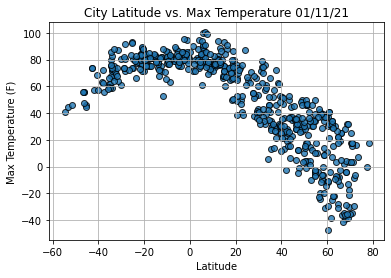

In [57]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

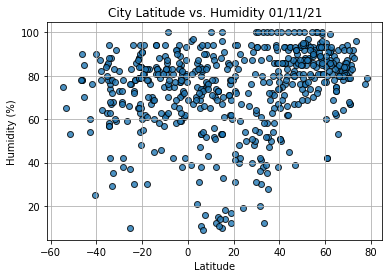

In [58]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

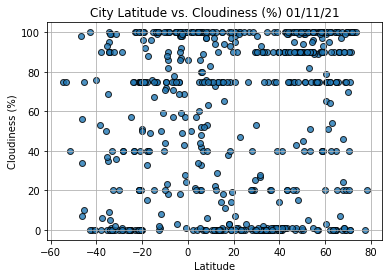

In [59]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

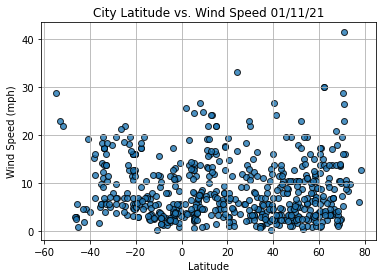

In [60]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [64]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [65]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [66]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [67]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

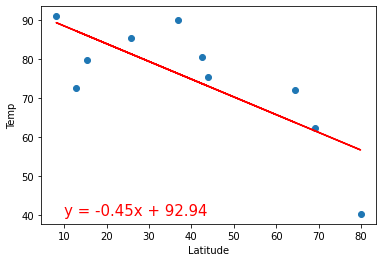

In [68]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [73]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [74]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alexandria,EG,2021-01-11 12:57:32,31.2156,29.9553,71.28,54,0,14.94
2,Oussouye,SN,2021-01-11 12:59:43,12.4850,-16.5469,82.40,38,0,16.11
3,Glace Bay,CA,2021-01-11 12:59:43,46.1969,-59.9570,28.00,80,75,8.05
4,Tasiilaq,GL,2021-01-11 12:54:05,65.6145,-37.6368,19.40,53,75,3.44
8,Zverinogolovskoye,RU,2021-01-11 12:59:44,54.4586,64.8542,-4.29,90,100,11.74


In [75]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

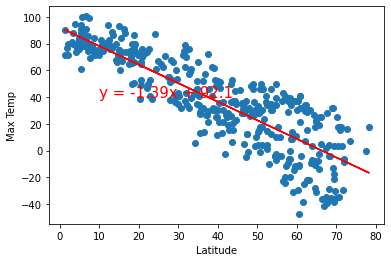

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

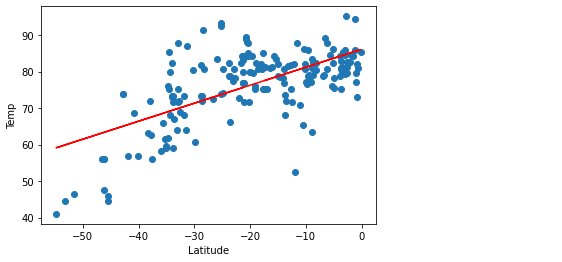

In [101]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [102]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Import linregress
    from scipy.stats import linregress

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [103]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alexandria,EG,2021-01-11 12:57:32,31.2156,29.9553,71.28,54,0,14.94
2,Oussouye,SN,2021-01-11 12:59:43,12.4850,-16.5469,82.40,38,0,16.11
3,Glace Bay,CA,2021-01-11 12:59:43,46.1969,-59.9570,28.00,80,75,8.05
4,Tasiilaq,GL,2021-01-11 12:54:05,65.6145,-37.6368,19.40,53,75,3.44
8,Zverinogolovskoye,RU,2021-01-11 12:59:44,54.4586,64.8542,-4.29,90,100,11.74


In [104]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

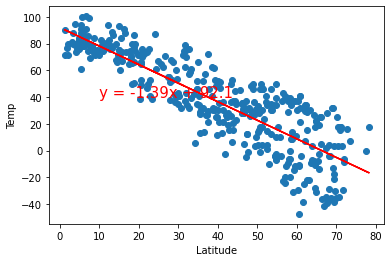

In [106]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [107]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [108]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alexandria,EG,2021-01-11 12:57:32,31.2156,29.9553,71.28,54,0,14.94
2,Oussouye,SN,2021-01-11 12:59:43,12.4850,-16.5469,82.40,38,0,16.11
3,Glace Bay,CA,2021-01-11 12:59:43,46.1969,-59.9570,28.00,80,75,8.05
4,Tasiilaq,GL,2021-01-11 12:54:05,65.6145,-37.6368,19.40,53,75,3.44
8,Zverinogolovskoye,RU,2021-01-11 12:59:44,54.4586,64.8542,-4.29,90,100,11.74


In [109]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

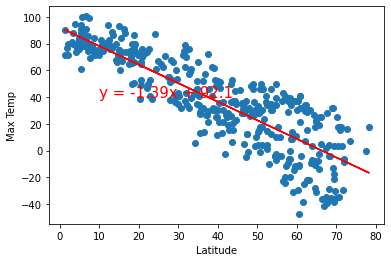

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

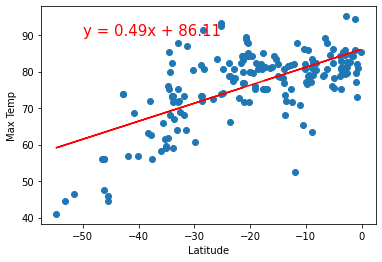

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

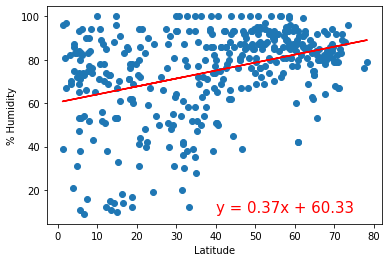

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

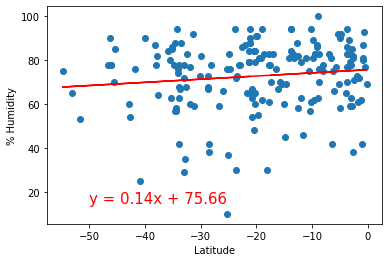

In [121]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

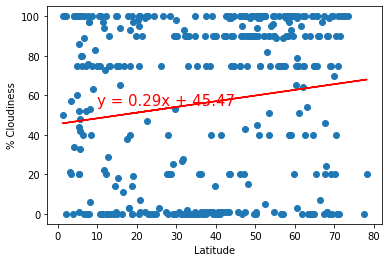

In [122]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

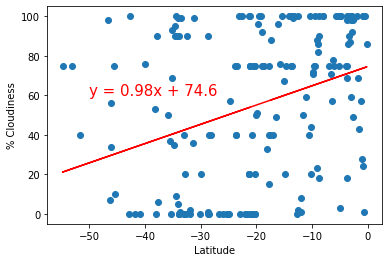

In [124]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

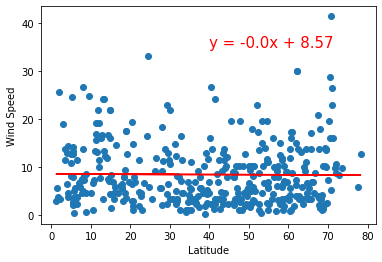

In [125]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

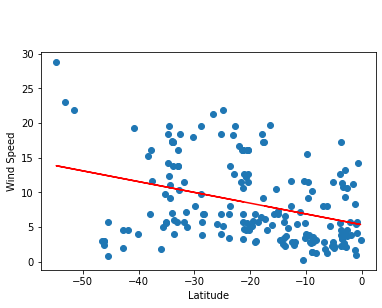

In [126]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))